> **Copyright &copy; 2020 CertifAI Sdn. Bhd.**<br>
 **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). \
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime

%matplotlib inline

In [2]:
start = datetime(2010, 1, 1)
end = datetime(2015, 12, 31)

df = web.get_data_yahoo('TSLA', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


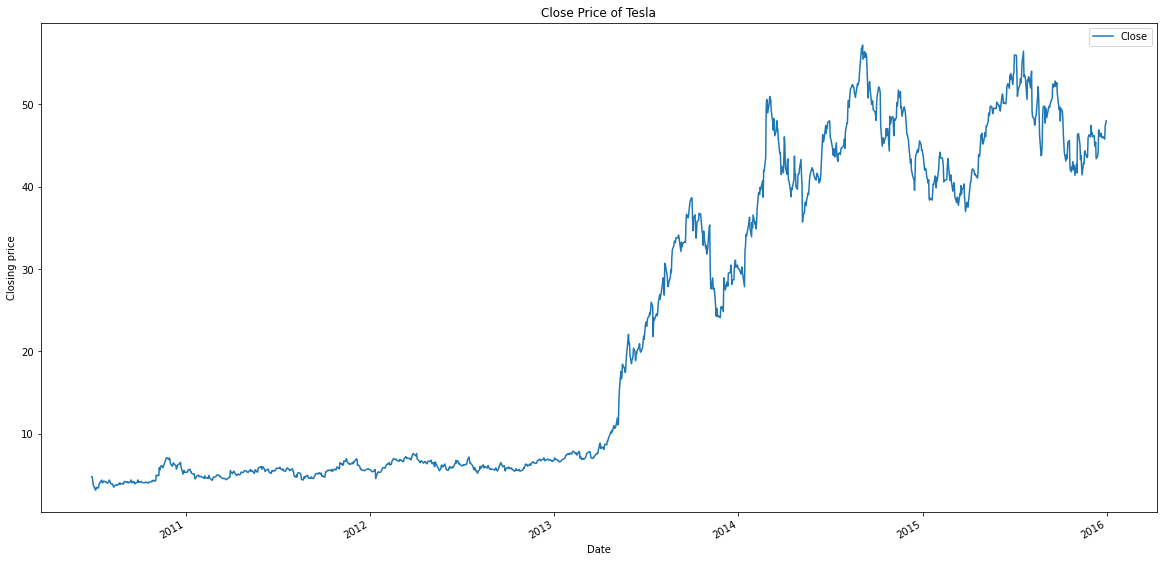

In [3]:
df[['Close']].plot(figsize=(20,10))
plt.title('Close Price of Tesla')
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.show()

## Simple Moving Average

We can create moving average easily using a built-in method directly from pandas's `dataframe` object call `rolling`. Let us create the 14 days moving average of Tesla's close price.

In [4]:
window_size = 14
rolling = df['Close'].rolling(window_size)

The `rolling` method comes with several other methods like `median`, `mean`, `corr` and etc. Run the following cell to print out the available methods.

In [5]:
dir(rolling)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_doc',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply',
 '_attributes',
 '_builtin_table',
 '_center_window',
 '_constructor',
 '_create_blocks',
 '_cython_table',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_generate_cython_apply_func',
 '_get_cython_func',
 '_get_cython_func_type',
 '_get_roll_func',
 '_get_win_type',
 '_get_window',
 '_get_window_indexer',
 '_gotitem',
 '_internal_names',
 '_internal_names_set',
 '_is_builtin_func',
 '_obj_with_exclusions',
 '_on',
 '_pre

We are interested in finding the moving average of the closing price of TESLA. We will choose `mean`.

In [6]:
df['ma_14'] = df['Close'].rolling(window_size).mean()

In [7]:
df.head(14)

,High,Low,Open,Close,Volume,Adj Close,ma_14
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,NaN
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,NaN
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,NaN
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,NaN
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,NaN
2010-07-07,3.326,2.996,3.280,3.160,34608500,3.160,NaN
2010-07-08,3.504,3.114,3.228,3.492,38557000,3.492,NaN
2010-07-09,3.580,3.310,3.516,3.480,20253000,3.480,NaN
2010-07-12,3.614,3.400,3.590,3.410,11012500,3.410,NaN


### Practice

In [8]:
#create a 30 days moving average of Tesla's close price and store it in a new column call ma_30
df['ma_30'] = df['Close'].rolling(30).mean()

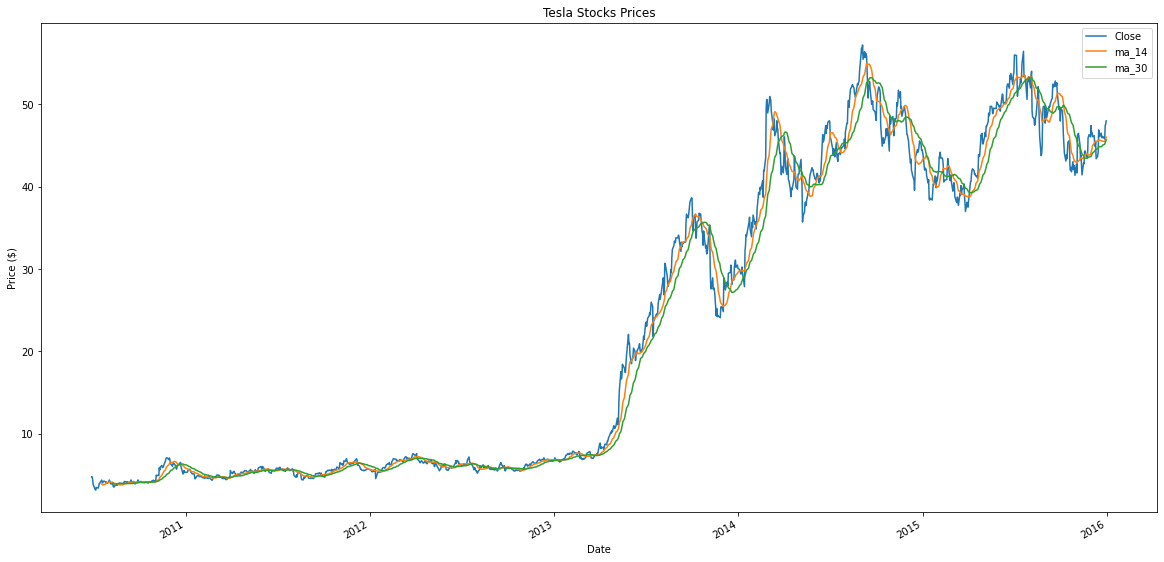

In [9]:
# plot the close price, ma_14 and ma_30

#set figure size to (20,10)
df[['Close', 'ma_14', 'ma_30']].plot(figsize=(20,10))

#set the title to 'Tesla Stocks Prices'
plt.title('Tesla Stocks Prices')

#create a legend
plt.legend()

#set xlabel to 'Date'
plt.xlabel('Date')

#set ylabel to 'Price ($)'
plt.ylabel('Price ($)')

#show the graph
plt.show()

Let us get back to our notebook and continue to explore the graph. Let us zoom in to the stock price of the last 150 days. Here we can see that moving average of shorter timeframe reacts faster than the moving average of a longer timeframe.

<AxesSubplot:xlabel='Date'>

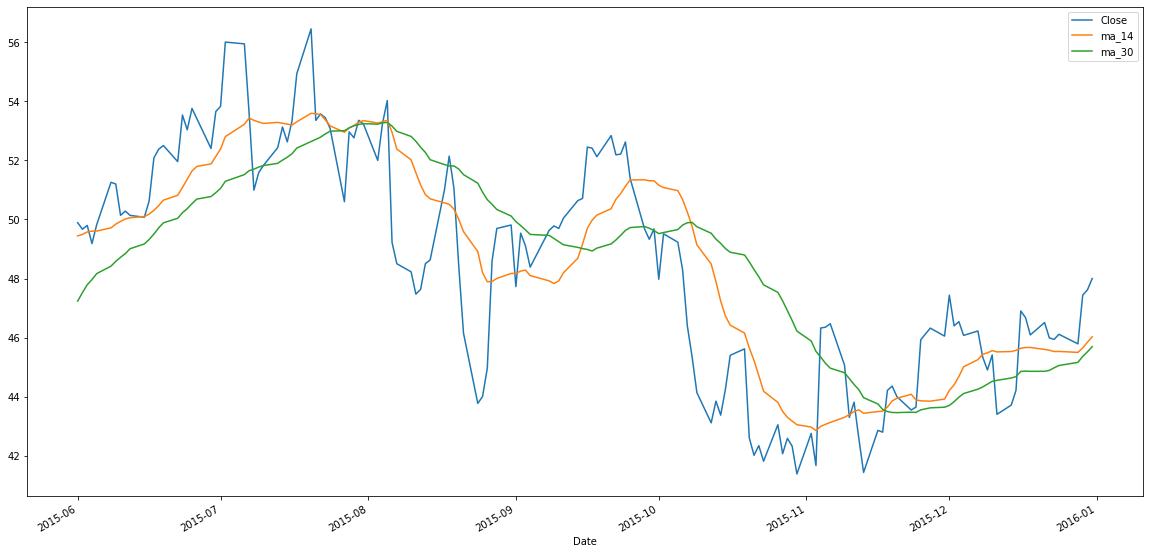

In [10]:
df.iloc[-150:][['Close', 'ma_14', 'ma_30']].plot(figsize=(20,10))

## Exponential Weighted Moving Average (EWMA)

We can calculate EWMA easily by using the `ewm` method provided by `pandas`. The `ewm` method takes in one extra parameter which could be either `com`, `span`, `halflife` or `alpha`. However, the `alpha` term can be either calculated directly from `com`, `span`, and `halflife` (calculated automatically by `pandas`) or insert directly by the user.
$$
\alpha=\left\{\begin{array}{ll}
\frac{2}{s+1}, & \text { for span } s \geq 1 \\
\frac{1}{1+c}, & \text { for center of mass } c \geq 0 \\
1-\exp \frac{\log 0.5}{h}, & \text { for half-life } h>0
\end{array}\right.
$$

Refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-exponentially-weighted) for more details on how the `alpha` can be calculated using `com`, `span`and `halflife`.

In our example, `span` will be used since it corresponds to what is commonly called an “N-day EW moving average”.

In [11]:
ewm = df['Close'].ewm(span=window_size)

Similar to `rolling`, `ewm` is also an object, which you can further calculate the moving average mean, correlation, and etc by using it.

In [12]:
ewm

ExponentialMovingWindow [com=6.5,min_periods=1,adjust=True,ignore_na=False,axis=0]

To show how the value of `alpha` is calculated:

In [13]:
df['Close'].ewm(span=window_size, adjust=False).mean()

Date
2010-06-29     4.778000
2010-06-30     4.776400
2010-07-01     4.725147
2010-07-02     4.607127
2010-07-06     4.422443
                ...    
2015-12-24    45.732728
2015-12-28    45.740364
2015-12-29    45.966716
2015-12-30    46.186887
2015-12-31    46.428902
Name: Close, Length: 1388, dtype: float64

In [14]:
df['Close'].ewm(alpha=2/(window_size+1), adjust=False).mean()

Date
2010-06-29     4.778000
2010-06-30     4.776400
2010-07-01     4.725147
2010-07-02     4.607127
2010-07-06     4.422443
                ...    
2015-12-24    45.732728
2015-12-28    45.740364
2015-12-29    45.966716
2015-12-30    46.186887
2015-12-31    46.428902
Name: Close, Length: 1388, dtype: float64

To find the ewma of the stock prices, we can use `.mean()` method. For example, the ewma of window size 14 can be written as follows.

In [15]:
window_size = 14

#adjust is equals to False here since we are using the equation that we derived in the class
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
df['ewma_14'] = df['Close'].ewm(span=window_size, adjust=False).mean()

### Practice

In [16]:
#create an ewma of window size = 30 and store in under a new column call 'ewma_30'

df['ewma_30'] = df['Close'].ewm(span=30, adjust=False).mean()

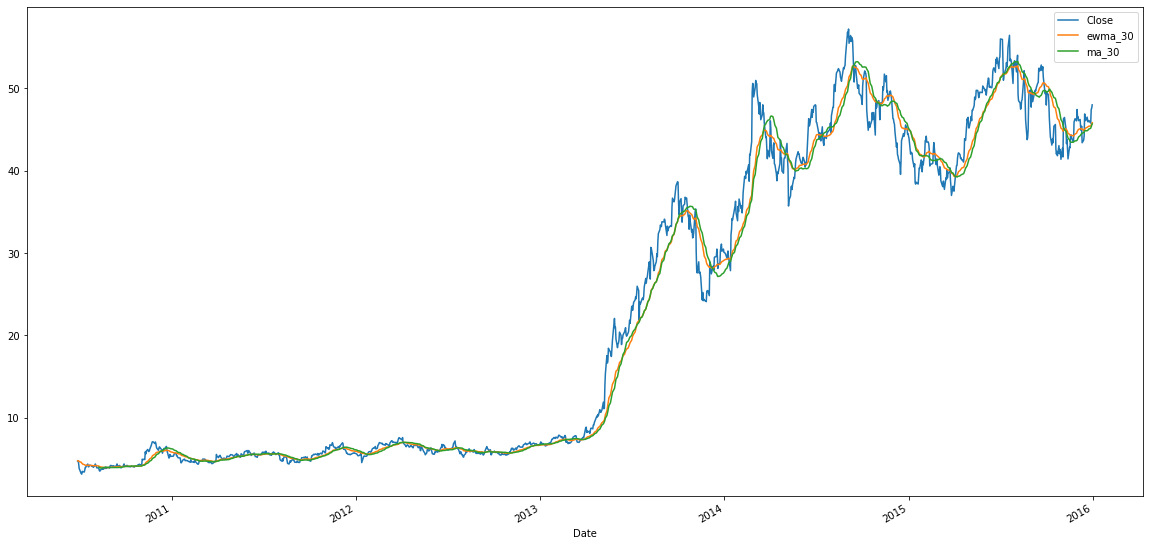

In [17]:
# plot close price, ma 30, ewma 30 on a same graph

df[['Close', 'ewma_30', 'ma_30']].plot(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='Date'>

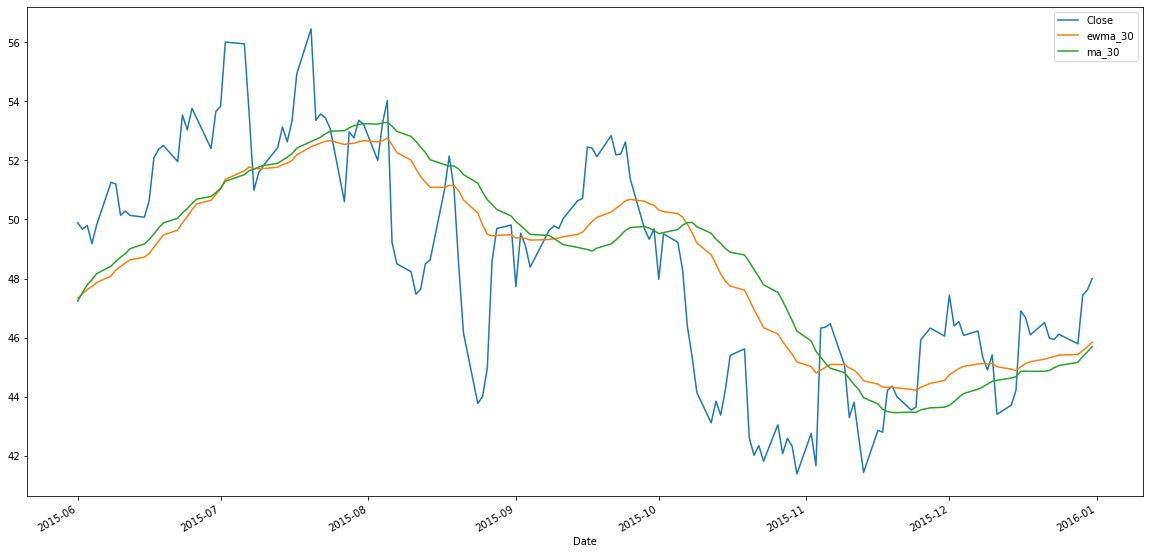

In [18]:
#plot the close price of the last 150 days, ma 30, ewma 30 on a same graph
df.iloc[-150:][['Close', 'ewma_30', 'ma_30']].plot(figsize=(20,10))

From the graph above, it is clearly shown that the ewma 30 is leading the ma 30. 

Resources:
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-exponentially-weighted
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html